In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.patches as mpatches

In [2]:
# 1. Generate structured synthetic data
# 100 samples, 10 features (6 informative)(2 useless)(2 Noicy)

data, labels = make_classification(n_samples = 100, n_features = 10, 
                                   n_informative= 6, n_redundant = 2, 
                                   n_classes =2, random_state =42)

In [3]:
# 2. Split data into training and testing sets

X_train, X_test, y_train,y_test = train_test_split(data, labels, test_size =0.2, random_state = 42)

In [4]:
# 3. Standardize features

scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 4. Define AIRS-like training with SVM

def ais_training(X_train, y_train, num_detectors = 20):
    
    # Randomly select samples as detectors
    detector_indices = np.random.choice(len(X_train), num_detectors,replace = False)
    detectors = X_train[detector_indices]
    
    # Train SVM classifier on detectors
    svm = SVC(kernel ='rbf', probability = True)
    svm.fit(detectors , y_train[detector_indices])
    
    
    return svm

In [6]:
print(data)

[[-3.45912346e-01 -1.73296955e-01 -5.32492851e-01 -4.45502521e-01
   5.87897848e-01  5.58144061e-02  2.22519937e+00  2.30564664e-01
   1.84134319e-01  1.45338448e+00]
 [ 1.46646208e+00 -6.52063441e-01  3.25473188e-01  6.32407739e-01
  -3.35354270e+00 -3.98368258e-01 -2.17626799e-01 -1.69629700e+00
   2.15335264e+00  9.72554450e-01]
 [ 6.44165187e-02 -5.21934116e-01  1.84805559e+00 -9.52955324e-02
  -2.56066567e+00 -1.94442705e+00 -1.11140046e+00  1.84524580e-01
   3.72260529e-01  2.79021526e-01]
 [-1.34970197e-01 -3.47844608e+00 -1.16836973e+00  5.90654831e-01
  -2.97267617e+00 -6.86918006e-01  8.24610565e-01 -2.07001060e+00
   5.75252663e-01  1.10870358e+00]
 [-7.94157021e-01 -1.39482381e+00 -1.49051782e+00  5.59790448e-01
  -6.86248058e-01  7.80729471e-02  1.33098660e-01 -2.55824063e+00
   3.26306152e+00  1.08078073e+00]
 [ 8.96641472e-01 -1.53468132e+00 -2.91478312e-01 -3.07778235e-01
  -8.68420551e-01 -2.70501769e+00  9.01185309e-01  1.66672715e+00
   1.12580382e+00  2.19150328e-01

In [7]:
print(labels)

[1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0]


In [8]:
# 5. Train AIRS-inspired model
svm_classifier = ais_training(X_trained_scaled, y_train,num_detectors = 30 )

In [9]:
prediction = svm_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [10]:
print(accuracy_score(y_test, prediction) *100)

75.0


In [11]:
accuracy = np.mean(prediction == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.00%


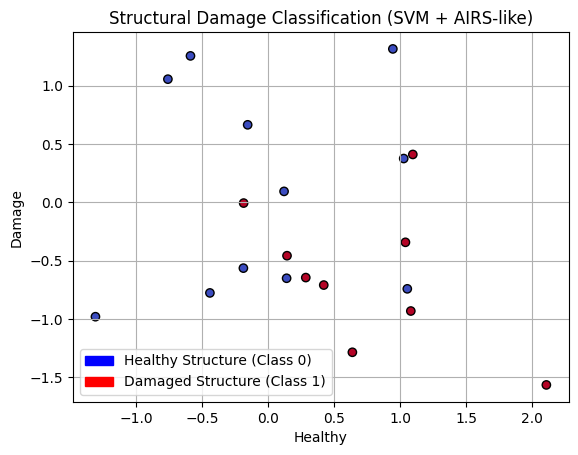

In [12]:
#Visualize (using first 2 features)

healthy_patch = mpatches.Patch(color='blue', label='Healthy Structure (Class 0)')
damaged_patch = mpatches.Patch(color='red', label='Damaged Structure (Class 1)')
plt.legend(handles=[healthy_patch, damaged_patch])
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=prediction, cmap='coolwarm', edgecolor='k')
plt.title("Structural Damage Classification (SVM + AIRS-like)")
plt.xlabel("Healthy")
plt.ylabel("Damage")
plt.grid(True)
plt.show()